In [447]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler

In [448]:
king = pd.read_csv('data/kc_house_data.csv')

In [449]:
king.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [450]:
king = king[['price','bedrooms','bathrooms','sqft_living','grade','sqft_lot']]
king.head()

,price,bedrooms,bathrooms,sqft_living,grade,sqft_lot
0,221900.0,3,1.00,1180,7,5650
1,538000.0,3,2.25,2570,7,7242
2,180000.0,2,1.00,770,6,10000
3,604000.0,4,3.00,1960,7,5000
4,510000.0,3,2.00,1680,8,8080


In [451]:
king.corr()

,price,bedrooms,bathrooms,sqft_living,grade,sqft_lot
price,1.000000,0.308787,0.525906,0.701917,0.667951,0.089876
bedrooms,0.308787,1.000000,0.514508,0.578212,0.356563,0.032471
bathrooms,0.525906,0.514508,1.000000,0.755758,0.665838,0.088373
sqft_living,0.701917,0.578212,0.755758,1.000000,0.762779,0.173453
grade,0.667951,0.356563,0.665838,0.762779,1.000000,0.114731
sqft_lot,0.089876,0.032471,0.088373,0.173453,0.114731,1.000000


In [452]:
king['sqft_lot'].std()

king['occupancy_per_sqft'] = round(king['sqft_living']/king['bedrooms'])

bins = [0,8000, 40000,500000]

bin_names = ['urban', 'suburban', 'rural']

king['sqft_lot'] = pd.cut(king['sqft_lot'], bins, labels = bin_names)

lot_dummies = pd.get_dummies(king.sqft_lot).iloc[:,:2]

king = pd.concat([king, lot_dummies], axis = 1)

king.drop(['sqft_lot'], axis = 1, inplace = True)

In [427]:
king.head()

,price,bedrooms,bathrooms,sqft_living,grade,occupancy_per_sqft,urban,suburban
0,221900.0,3,1.00,1180,7,393.0,1,0
1,538000.0,3,2.25,2570,7,857.0,1,0
2,180000.0,2,1.00,770,6,385.0,0,1
3,604000.0,4,3.00,1960,7,490.0,1,0
4,510000.0,3,2.00,1680,8,560.0,0,1


In [428]:
king_dummies = pd.get_dummies(king.grade).iloc[:,1:]
king_gradedum = pd.concat([king,king_dummies], axis = 1)

king_final = king_gradedum.drop(['grade'], axis = 1)

king_final.head()

,price,bedrooms,bathrooms,sqft_living,occupancy_per_sqft,urban,suburban,4,5,6,7,8,9,10,11,12,13
0,221900.0,3,1.00,1180,393.0,1,0,0,0,0,1,0,0,0,0,0,0
1,538000.0,3,2.25,2570,857.0,1,0,0,0,0,1,0,0,0,0,0,0
2,180000.0,2,1.00,770,385.0,0,1,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,490.0,1,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680,560.0,0,1,0,0,0,0,1,0,0,0,0,0


In [429]:
king_y = pd.DataFrame(king_final.price)

king_x = king_final.drop(['price'], axis = 1)

king_train_x, king_test_x, king_train_y, king_test_y = train_test_split(
    king_x, king_y, test_size = .3, random_state = 5)
   

In [430]:
king_train_x.head()

,bedrooms,bathrooms,sqft_living,occupancy_per_sqft,urban,suburban,4,5,6,7,8,9,10,11,12,13
15401,3,2.25,2750,917.0,1,0,0,0,0,1,0,0,0,0,0,0
5041,2,1.00,1110,555.0,1,0,0,0,1,0,0,0,0,0,0,0
20194,4,2.50,2890,722.0,1,0,0,0,0,0,0,1,0,0,0,0
3279,5,2.50,3150,630.0,0,0,0,0,0,0,0,1,0,0,0,0
13348,3,1.00,1340,447.0,1,0,0,0,0,1,0,0,0,0,0,0


In [431]:
king_train_x.head()

,bedrooms,bathrooms,sqft_living,occupancy_per_sqft,urban,suburban,4,5,6,7,8,9,10,11,12,13
15401,3,2.25,2750,917.0,1,0,0,0,0,1,0,0,0,0,0,0
5041,2,1.00,1110,555.0,1,0,0,0,1,0,0,0,0,0,0,0
20194,4,2.50,2890,722.0,1,0,0,0,0,0,0,1,0,0,0,0
3279,5,2.50,3150,630.0,0,0,0,0,0,0,0,1,0,0,0,0
13348,3,1.00,1340,447.0,1,0,0,0,0,1,0,0,0,0,0,0


In [432]:
king_train_x_a = king_train_x[['bathrooms', 'bedrooms',]]

In [433]:
king_train_x_a.head()

,bathrooms,bedrooms
15401,2.25,3
5041,1.00,2
20194,2.50,4
3279,2.50,5
13348,1.00,3


In [434]:
# king_model = ols(formula=formula, data=king_final).fit()
# king_model.summary()

model = sm.OLS(king_train_y, king_train_x_a).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.773
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                          2.581e+04
Date:                Thu, 22 Oct 2020   Prob (F-statistic):                        0.00
Time:                        07:06:19   Log-Likelihood:                     -2.1250e+05
No. Observations:               15117   AIC:                                  4.250e+05
Df Residuals:                   15115   BIC:                                  4.250e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bathrooms   2.282e+05   3666.665     62.228      0.000    2.21e+05    2.35e+05
bedrooms    1.718e+04   2349.277      7.312      0.000    1.26e+04    2.18e+04
==============================================================================
Omnibus:                    12283.353   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           657804.191
Skew:                           3.527   Prob(JB):                         0.00
Kurtosis:                      34.537   Cond. No.                         7.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [436]:
king_train_x_b = king_train_x[['bathrooms', 'bedrooms', 'occupancy_per_sqft']]

In [437]:
king_train_x_b.head()

,bathrooms,bedrooms,occupancy_per_sqft
15401,2.25,3,917.0
5041,1.00,2,555.0
20194,2.50,4,722.0
3279,2.50,5,630.0
13348,1.00,3,447.0


In [438]:

model = sm.OLS(king_train_y, king_train_x_b).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.804
Model:                            OLS   Adj. R-squared (uncentered):              0.804
Method:                 Least Squares   F-statistic:                          2.064e+04
Date:                Thu, 22 Oct 2020   Prob (F-statistic):                        0.00
Time:                        07:06:41   Log-Likelihood:                     -2.1142e+05
No. Observations:               15117   AIC:                                  4.228e+05
Df Residuals:                   15114   BIC:                                  4.229e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
bathrooms           9.233e+04   4420.285     20.889      0.000    8.37e+04    1.01e+05
bedrooms            9346.1556   2192.372      4.263      0.000    5048.841    1.36e+04
occupancy_per_sqft   536.2891     11.093     48.345      0.000     514.546     558.033
==============================================================================
Omnibus:                    13608.702   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           959736.696
Skew:                           4.066   Prob(JB):                         0.00
Kurtosis:                      41.178   Cond. No.                     1.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [439]:
king_train_x_c = king_train_x[['bathrooms', 'bedrooms', 'occupancy_per_sqft', 'urban', 'suburban']]

In [440]:
king_train_x_c.head()

,bathrooms,bedrooms,occupancy_per_sqft,urban,suburban
15401,2.25,3,917.0,1,0
5041,1.00,2,555.0,1,0
20194,2.50,4,722.0,1,0
3279,2.50,5,630.0,0,0
13348,1.00,3,447.0,1,0


In [441]:

model = sm.OLS(king_train_y, king_train_x_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.811
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                          1.300e+04
Date:                Thu, 22 Oct 2020   Prob (F-statistic):                        0.00
Time:                        07:06:48   Log-Likelihood:                     -2.1112e+05
No. Observations:               15117   AIC:                                  4.222e+05
Df Residuals:                   15112   BIC:                                  4.223e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
bathrooms           8.308e+04   4388.627     18.931      0.000    7.45e+04    9.17e+04
bedrooms             4.31e+04   2632.948     16.371      0.000    3.79e+04    4.83e+04
occupancy_per_sqft   625.3810     11.646     53.698      0.000     602.553     648.209
urban              -1.778e+05   7221.262    -24.616      0.000   -1.92e+05   -1.64e+05
suburban           -1.525e+05   8042.780    -18.960      0.000   -1.68e+05   -1.37e+05
==============================================================================
Omnibus:                    12919.592   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           834487.861
Skew:                           3.758   Prob(JB):                         0.00
Kurtosis:                      38.614   Cond. No.                     2.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [442]:
king_train_x.head()

,bedrooms,bathrooms,sqft_living,occupancy_per_sqft,urban,suburban,4,5,6,7,8,9,10,11,12,13
15401,3,2.25,2750,917.0,1,0,0,0,0,1,0,0,0,0,0,0
5041,2,1.00,1110,555.0,1,0,0,0,1,0,0,0,0,0,0,0
20194,4,2.50,2890,722.0,1,0,0,0,0,0,0,1,0,0,0,0
3279,5,2.50,3150,630.0,0,0,0,0,0,0,0,1,0,0,0,0
13348,3,1.00,1340,447.0,1,0,0,0,0,1,0,0,0,0,0,0


In [443]:

model = sm.OLS(king_train_y, king_train_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              6306.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):                        0.00
Time:                        07:06:53   Log-Likelihood:                     -2.0832e+05
No. Observations:               15117   AIC:                                  4.167e+05
Df Residuals:                   15101   BIC:                                  4.168e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
bedrooms           -2.789e+04   4970.431     -5.612      0.000   -3.76e+04   -1.82e+04
bathrooms          -2.192e+04   4096.358     -5.352      0.000      -3e+04   -1.39e+04
sqft_living          204.3603      8.551     23.899      0.000     187.599     221.122
occupancy_per_sqft   -54.5294     26.557     -2.053      0.040    -106.584      -2.475
urban                1.05e+05   8753.011     11.998      0.000    8.79e+04    1.22e+05
suburban            6.757e+04   8719.150      7.749      0.000    5.05e+04    8.47e+04
4                   8.494e+04   5.37e+04      1.581      0.114   -2.03e+04     1.9e+05
5                   8.561e+04   2.59e+04      3.308      0.001    3.49e+04    1.36e+05
6                   9.982e+04   1.96e+04      5.087      0.000    6.14e+04    1.38e+05
7                   1.305e+05   2.01e+04      6.484      0.000     9.1e+04     1.7e+05
8                   1.952e+05   2.11e+04      9.271      0.000    1.54e+05    2.36e+05
9                    3.16e+05    2.2e+04     14.342      0.000    2.73e+05    3.59e+05
10                  5.078e+05   2.35e+04     21.603      0.000    4.62e+05    5.54e+05
11                  7.904e+05   2.71e+04     29.184      0.000    7.37e+05    8.43e+05
12                  1.279e+06   3.95e+04     32.410      0.000     1.2e+06    1.36e+06
13                  2.626e+06   8.74e+04     30.052      0.000    2.46e+06     2.8e+06
==============================================================================
Omnibus:                     9793.564   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           339991.316
Skew:                           2.602   Prob(JB):                         0.00
Kurtosis:                      25.643   Cond. No.                     1.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [444]:
king_test_x

,bedrooms,bathrooms,sqft_living,occupancy_per_sqft,urban,suburban,4,5,6,7,8,9,10,11,12,13
15393,4,3.00,1990,498.0,1,0,0,0,0,1,0,0,0,0,0,0
6035,4,4.00,6330,1582.0,0,1,0,0,0,0,0,0,0,0,0,1
12871,4,2.75,4270,1068.0,0,1,0,0,0,0,0,0,0,1,0,0
21099,4,2.50,1950,488.0,1,0,0,0,0,0,1,0,0,0,0,0
11629,2,1.50,1150,575.0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,3,1.75,1320,440.0,1,0,0,0,0,0,1,0,0,0,0,0
19040,4,2.25,3070,768.0,0,1,0,0,0,0,0,1,0,0,0,0
18250,2,1.00,760,380.0,1,0,0,0,0,1,0,0,0,0,0,0
7496,5,1.00,1500,300.0,1,0,0,0,0,1,0,0,0,0,0,0


In [445]:
king_test_x.shape

(6480, 16)

In [446]:

model = sm.OLS(king_test_y, king_test_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     673.6
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        07:07:06   Log-Likelihood:                -89453.
No. Observations:                6480   AIC:                         1.789e+05
Df Residuals:                    6464   BIC:                         1.790e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
bedrooms           -4.432e+04   9366.661     -4.732      0.000   -6.27e+04    -2.6e+04
bathrooms          -1122.9546   6273.341     -0.179      0.858   -1.34e+04    1.12e+04
sqft_living          217.9813     14.970     14.562      0.000     188.636     247.327
occupancy_per_sqft   -68.3119     46.255     -1.477      0.140    -158.986      22.362
urban               9.041e+04   1.37e+04      6.581      0.000    6.35e+04    1.17e+05
suburban            4.663e+04   1.37e+04      3.401      0.001    1.98e+04    7.35e+04
4                   9.598e+04   1.02e+05      0.941      0.347   -1.04e+05    2.96e+05
5                   9.521e+04   4.07e+04      2.341      0.019    1.55e+04    1.75e+05
6                   1.154e+05   3.42e+04      3.377      0.001    4.84e+04    1.82e+05
7                   1.458e+05   3.51e+04      4.155      0.000     7.7e+04    2.15e+05
8                   1.963e+05   3.65e+04      5.383      0.000    1.25e+05    2.68e+05
9                   3.027e+05   3.76e+04      8.045      0.000    2.29e+05    3.76e+05
10                  4.975e+05   3.95e+04     12.609      0.000     4.2e+05    5.75e+05
11                  7.545e+05   4.31e+04     17.491      0.000     6.7e+05    8.39e+05
12                  1.322e+06   5.78e+04     22.868      0.000    1.21e+06    1.44e+06
13                  2.095e+06   1.16e+05     18.068      0.000    1.87e+06    2.32e+06
==============================================================================
Omnibus:                     3818.780   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           105361.408
Skew:                           2.319   Prob(JB):                         0.00
Kurtosis:                      22.202   Cond. No.                     1.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [172]:
king_model = ols(formula='price~bedrooms+bathrooms+occupancy_per_sqft', data=king_final).fit()
king_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     5831.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        06:00:06   Log-Likelihood:            -3.0098e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21593   BIC:                         6.020e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -4.792e+05   9105.252    -52.634      0.000   -4.97e+05   -4.61e+05
bedrooms            1.025e+05   2547.262     40.241      0.000    9.75e+04    1.07e+05
bathrooms           5.843e+04   3584.589     16.299      0.000    5.14e+04    6.55e+04
occupancy_per_sqft   890.0012     10.951     81.271      0.000     868.536     911.466
==============================================================================
Omnibus:                    16904.498   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1034052.711
Skew:                           3.275   Prob(JB):                         0.00
Kurtosis:                      36.260   Cond. No.                     3.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [184]:
king_y = pd.DataFrame(king_final.price)

king_x = king_final.drop(['price','urban', 'suburban','sqft_living'], axis = 1,  inplace = False)


In [185]:
king_x

,bedrooms,bathrooms,occupancy_per_sqft,4,5,6,7,8,9,10,11,12,13
0,3,1.00,393.0,0,0,0,1,0,0,0,0,0,0
1,3,2.25,857.0,0,0,0,1,0,0,0,0,0,0
2,2,1.00,385.0,0,0,1,0,0,0,0,0,0,0
3,4,3.00,490.0,0,0,0,1,0,0,0,0,0,0
4,3,2.00,560.0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,510.0,0,0,0,0,1,0,0,0,0,0
21593,4,2.50,578.0,0,0,0,0,1,0,0,0,0,0
21594,2,0.75,510.0,0,0,0,1,0,0,0,0,0,0
21595,3,2.50,533.0,0,0,0,0,1,0,0,0,0,0


In [186]:

model = sm.OLS(king_y, king_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                          1.057e+04
Date:                Thu, 22 Oct 2020   Prob (F-statistic):                        0.00
Time:                        06:04:51   Log-Likelihood:                     -2.9826e+05
No. Observations:               21597   AIC:                                  5.966e+05
Df Residuals:                   21584   BIC:                                  5.967e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
bedrooms             6.74e+04   2329.203     28.936      0.000    6.28e+04     7.2e+04
bathrooms           1.351e+04   3360.618      4.021      0.000    6926.659    2.01e+04
occupancy_per_sqft   470.3802     11.423     41.178      0.000     447.990     492.770
4                  -1.208e+05   4.68e+04     -2.580      0.010   -2.13e+05    -2.9e+04
5                  -1.355e+05   1.74e+04     -7.801      0.000    -1.7e+05   -1.01e+05
6                  -1.141e+05   1.01e+04    -11.312      0.000   -1.34e+05   -9.43e+04
7                  -9.171e+04   1.04e+04     -8.827      0.000   -1.12e+05   -7.13e+04
8                  -2.451e+04   1.19e+04     -2.066      0.039   -4.78e+04   -1259.103
9                    1.19e+05   1.39e+04      8.533      0.000    9.17e+04    1.46e+05
10                   3.36e+05   1.63e+04     20.568      0.000    3.04e+05    3.68e+05
11                  6.637e+05   2.05e+04     32.325      0.000    6.23e+05    7.04e+05
12                  1.248e+06   3.18e+04     39.225      0.000    1.19e+06    1.31e+06
13                  2.591e+06   7.05e+04     36.776      0.000    2.45e+06    2.73e+06
==============================================================================
Omnibus:                    14889.042   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           656682.008
Skew:                           2.780   Prob(JB):                         0.00
Kurtosis:                      29.436   Cond. No.                     2.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
king_y = pd.DataFrame(king_final.price)

king_x = king_final.drop(['price','sqft_living'], axis = 1,  inplace = False)


In [188]:
king_x.head()

,bedrooms,bathrooms,occupancy_per_sqft,urban,suburban,4,5,6,7,8,9,10,11,12,13
0,3,1.00,393.0,1,0,0,0,0,1,0,0,0,0,0,0
1,3,2.25,857.0,1,0,0,0,0,1,0,0,0,0,0,0
2,2,1.00,385.0,0,1,0,0,1,0,0,0,0,0,0,0
3,4,3.00,490.0,1,0,0,0,0,1,0,0,0,0,0,0
4,3,2.00,560.0,0,1,0,0,0,0,1,0,0,0,0,0


In [189]:

model = sm.OLS(king_y, king_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.865
Method:                 Least Squares   F-statistic:                              9249.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):                        0.00
Time:                        06:06:09   Log-Likelihood:                     -2.9817e+05
No. Observations:               21597   AIC:                                  5.964e+05
Df Residuals:                   21582   BIC:                                  5.965e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
bedrooms            7.262e+04   2365.342     30.704      0.000     6.8e+04    7.73e+04
bathrooms           8119.3720   3383.471      2.400      0.016    1487.519    1.48e+04
occupancy_per_sqft   502.5063     11.627     43.220      0.000     479.717     525.295
urban                8.85e+04   7503.365     11.795      0.000    7.38e+04    1.03e+05
suburban            5.653e+04   7489.156      7.548      0.000    4.18e+04    7.12e+04
4                  -2.053e+05   4.73e+04     -4.343      0.000   -2.98e+05   -1.13e+05
5                  -2.252e+05   1.89e+04    -11.890      0.000   -2.62e+05   -1.88e+05
6                  -2.107e+05    1.3e+04    -16.179      0.000   -2.36e+05   -1.85e+05
7                  -1.892e+05   1.33e+04    -14.175      0.000   -2.15e+05   -1.63e+05
8                  -1.226e+05   1.45e+04     -8.429      0.000   -1.51e+05   -9.41e+04
9                   2.196e+04   1.62e+04      1.352      0.176   -9880.264    5.38e+04
10                  2.453e+05   1.83e+04     13.439      0.000     2.1e+05    2.81e+05
11                  5.753e+05   2.21e+04     26.077      0.000    5.32e+05    6.19e+05
12                  1.164e+06   3.27e+04     35.626      0.000     1.1e+06    1.23e+06
13                  2.494e+06   7.08e+04     35.237      0.000    2.36e+06    2.63e+06
==============================================================================
Omnibus:                    14883.848   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           664653.393
Skew:                           2.774   Prob(JB):                         0.00
Kurtosis:                      29.605   Cond. No.                     2.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
king_train_x, king_test_x, king_train_y, king_test_y = train_test_split(
    king_x, king_y, test_size = .2, random_state = 5)
   

In [147]:

model = sm.OLS(king_train_y, king_train_x).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                              7830.
Date:                Wed, 21 Oct 2020   Prob (F-statistic):                        0.00
Time:                        15:03:46   Log-Likelihood:                     -2.3864e+05
No. Observations:               17277   AIC:                                  4.773e+05
Df Residuals:                   17263   BIC:                                  4.774e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
bedrooms             7.45e+04   2278.174     32.704      0.000       7e+04     7.9e+04
occupancy_per_sqft   511.8544     12.237     41.828      0.000     487.869     535.840
urban               9.001e+04   8442.375     10.661      0.000    7.35e+04    1.07e+05
suburban            5.787e+04   8446.676      6.851      0.000    4.13e+04    7.44e+04
4                  -2.081e+05   4.96e+04     -4.194      0.000   -3.05e+05   -1.11e+05
5                  -2.244e+05   2.18e+04    -10.305      0.000   -2.67e+05   -1.82e+05
6                  -2.092e+05   1.46e+04    -14.346      0.000   -2.38e+05   -1.81e+05
7                  -1.864e+05    1.5e+04    -12.431      0.000   -2.16e+05   -1.57e+05
8                  -1.169e+05   1.63e+04     -7.160      0.000   -1.49e+05   -8.49e+04
9                   3.151e+04   1.82e+04      1.727      0.084   -4242.906    6.73e+04
10                  2.524e+05   2.05e+04     12.322      0.000    2.12e+05    2.93e+05
11                  6.007e+05   2.49e+04     24.143      0.000    5.52e+05     6.5e+05
12                  1.146e+06   3.71e+04     30.874      0.000    1.07e+06    1.22e+06
13                  2.618e+06   7.46e+04     35.077      0.000    2.47e+06    2.76e+06
==============================================================================
Omnibus:                    12195.060   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           590179.749
Skew:                           2.849   Prob(JB):                         0.00
Kurtosis:                      31.060   Cond. No.                     2.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

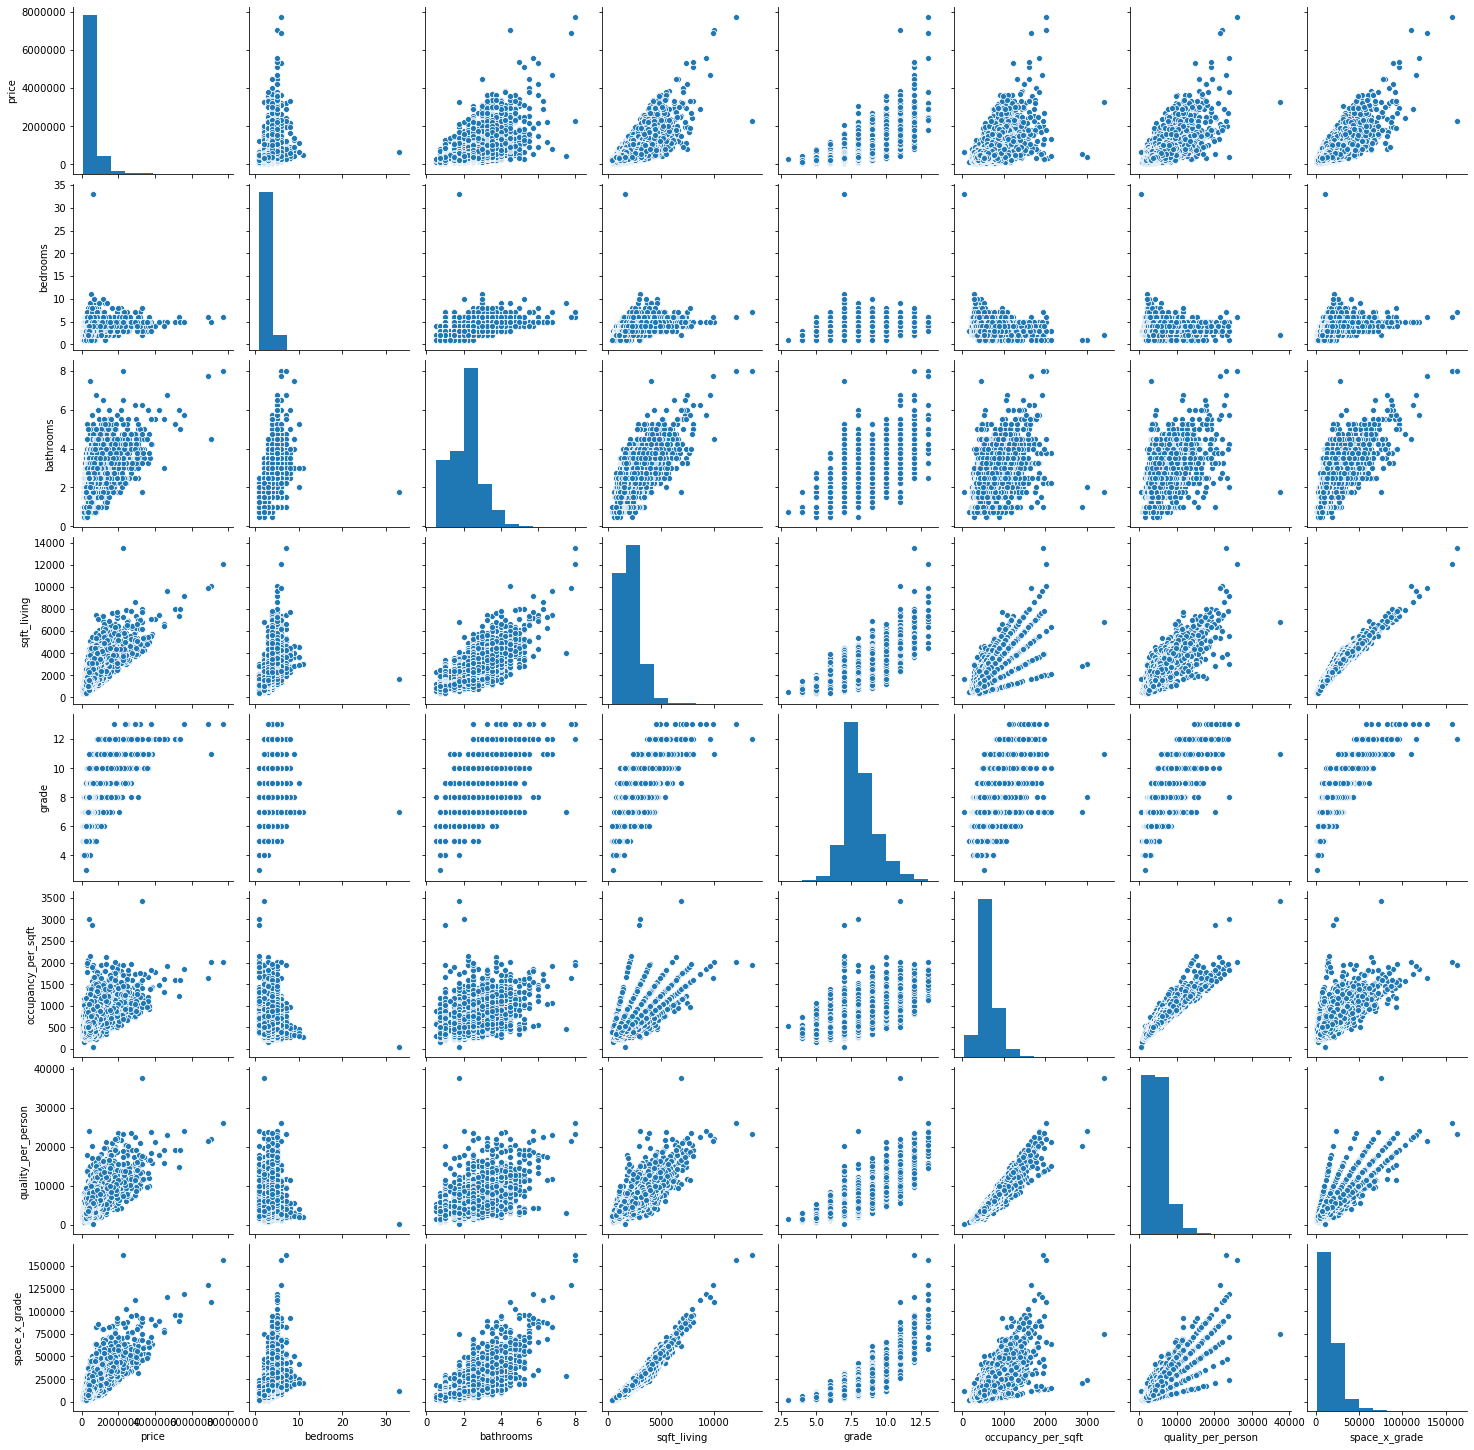

In [39]:
import seaborn as sns
sns.pairplot(king)


In [40]:
king_dummies = pd.get_dummies(king.grade).iloc[:,1:]
king_gradedum = pd.concat([king,king_dummies], axis = 1)

king_final = king_gradedum.drop(['grade'], axis = 1)

king_final.head()

,price,bedrooms,bathrooms,sqft_living,occupancy_per_sqft,quality_per_person,space_x_grade,4,5,6,7,8,9,10,11,12,13
0,221900.0,3,1.00,1180,393.0,2751.0,8260,0,0,0,1,0,0,0,0,0,0
1,538000.0,3,2.25,2570,857.0,5999.0,17990,0,0,0,1,0,0,0,0,0,0
2,180000.0,2,1.00,770,385.0,2310.0,4620,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,490.0,3430.0,13720,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680,560.0,4480.0,13440,0,0,0,0,1,0,0,0,0,0


In [28]:
king_final.loc[king_final.sqft_lot < 80000, 'sqft_lot'].median()

9947.092206001236

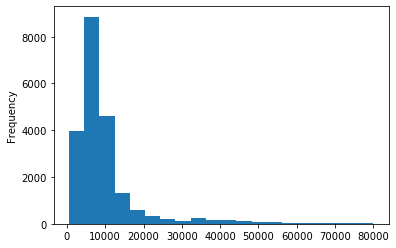

In [24]:
king_final.loc[king_final.sqft_lot < 80000, 'sqft_lot'].plot(kind='hist', bins = 20)

In [ ]:
king['x_factor'] = np.log(king['x_factor'])

In [ ]:
king_model = ols('price~bedrooms+bathrooms+sqft_living', data = king).fit()
king_model.summary()

In [ ]:
king_model = ols('price~grade+sqft_living', data = king).fit()
king_model.summary()

In [ ]:
g = king[king["grade"] == 7]
g.head()
king_model = ols('price~space_x_grade', data = g).fit()
king_model.summary()

In [ ]:
king_model = ols('price~space_x_grade', data = king).fit()
king_model.summary()

In [ ]:
king_model = ols('price~space_x_grade+bedrooms+bathrooms', data = king).fit()
king_model.summary()

In [ ]:
king_model = ols('price~quality_per_person', data = king).fit()
king_model.summary()

In [ ]:
quality_price = plt.scatter(x=king["condition"],
                        y=king["price"],
                          alpha=0.5)

In [ ]:
#plt.hist(king_quality.sqft_living)
import numpy as np
king_quality['sqft_living'] = np.log(king_quality['sqft_living'])
king_quality.loc[king_quality.sqft_living < 100000, 'sqft_living'].plot(kind='hist', bins = 20)



In [ ]:


king_model = ols('price~sqft_living', data = king).fit()

In [ ]:
king_model.summary()

In [ ]:
king_quality

7618.0

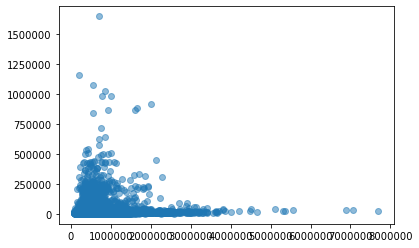

In [19]:
import matplotlib.pyplot as plt

quality_price = plt.scatter(x=king_final.price,
                        y=king_final.sqft_lot,
                          alpha=0.5)
king_final.sqft_lot.median()

In [ ]:
g.head()

In [93]:

king_final.loc[king_final.sqft_lot].plot(kind = 'hist', bins = 50)

AttributeError: 'DataFrame' object has no attribute 'sqft_lot'

In [ ]:
plt.hist(five_six_seven, 20, facecolor='blue', alpha=0.5)

In [329]:
five_six_seven.isnull().sum()

price                 0
bedrooms              0
bathrooms             0
sqft_living           0
grade                 0
occupancy_per_sqft    0
quality_per_person    0
space_x_grade         0
dtype: int64

In [1]:
king_model = ols('price~space_x_grade+bathrooms', data = king).fit()
king_model.summary()

NameError: name 'ols' is not defined